# 実践演習8-4

Scikit learn の 多層ニューラルネットワークで識別を行います。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## データの読み込み

digitsデータを読み込み、パターン行列をXに、教師ベクトルをyに格納します。
そして、digitsデータのデータ数や特徴の次元数・値などを表示させて確認します。

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

パターン行列からデータを1つ取り出して、pyplotで表示します。imshowメソッドでは表示対象が行列である必要があるので、np.reshapeで64次元ベクトルを8×8行列に変換しています。

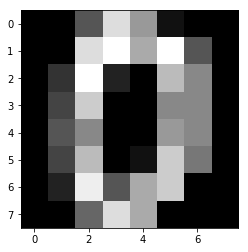

In [3]:
plt.gray()
plt.imshow(np.reshape(X[0],(8,8)))

教師ベクトルの最初の20要素程度を表示させて、どのようにデータが並んでいるのかを確認します。

In [4]:
y[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 3層での学習

[MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)を使って学習し、10-fold CVで性能を評価します。

In [5]:
nn = MLPClassifier(max_iter=500)
nn.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
scores = cross_val_score(nn, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.32 +/- 2.28 %


## GridSearch

まず3層構造で、適切な中間層のユニット数を求めます。
max_iterは、使用するPCの性能に応じて適宜調整してください。

In [7]:
param_grid = [
  {'hidden_layer_sizes': [(20,), (50,), (100,), (150,), (200,), (300,)]}
 ]

In [8]:
clf = GridSearchCV(nn, param_grid)
clf.fit(X, y)       

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(20,), (50,), (100,), (150,), (200,), (300,)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, std_score, params))

0.875 (+/- 0.069) for {'hidden_layer_sizes': (20,)}
0.915 (+/- 0.044) for {'hidden_layer_sizes': (50,)}
0.916 (+/- 0.041) for {'hidden_layer_sizes': (100,)}
0.929 (+/- 0.023) for {'hidden_layer_sizes': (150,)}
0.924 (+/- 0.025) for {'hidden_layer_sizes': (200,)}
0.945 (+/- 0.017) for {'hidden_layer_sizes': (300,)}


比較的性能の高い200ユニットで階層構造を構築してみます。

In [10]:
param_grid = [
  {'hidden_layer_sizes': [(200,200), (200,200,200), (200,200,200,200)]}
 ]

In [11]:
clf = GridSearchCV(nn, param_grid)
clf.fit(X, y)       

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(200, 200), (200, 200, 200), (200, 200, 200, 200)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, std_score, params))

0.947 (+/- 0.016) for {'hidden_layer_sizes': (200, 200)}
0.946 (+/- 0.005) for {'hidden_layer_sizes': (200, 200, 200)}
0.941 (+/- 0.018) for {'hidden_layer_sizes': (200, 200, 200, 200)}


中間層は3層程度がうまくゆくようです。